<a href="https://colab.research.google.com/github/0701Vatsal/ML_Practicals/blob/main/Simple_linear_regression_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [23]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData.csv to SalaryData.csv


In [25]:
dataset=pd.read_csv('SalaryData.csv')

In [26]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [27]:
y = dataset['Salary']
X = dataset['YearsExperience']

In [28]:
dataset

,YearsExperience,Salary
0,1.1,39341
1,1.3,462054
2,1.5,377314
3,2.0,435251
4,2.2,39891
5,2.9,566424
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [29]:
y

0      39341
1     462054
2     377314
3     435251
4      39891
5     566424
6      60150
7      54445
8      64445
9      57189
10    632181
11     55794
12     56957
13     57081
14     61111
15    679384
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64

In [30]:
X.shape

(30,)

In [31]:
type(X)

pandas.core.series.Series

In [32]:
X=X.values#converting into numpy array

In [33]:
X=X.reshape(-1,1)#reshaping the X 

In [34]:
X.shape

(30, 1)

In [35]:
y.shape

(30,)

In [36]:
from sklearn.linear_model import LinearRegression


In [37]:
model = LinearRegression()

In [38]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
model.predict([[6.8]])

array([142943.65798728])

In [40]:
model.predict([[0]])

array([269357.67974949])

In [41]:
c = model.coef_

In [42]:
c

array([-18590.29731797])

In [43]:
c*1.1

array([-20449.32704977])

In [44]:
yhat = model.predict(X)

In [45]:
yhat

array([248908.35269972, 245190.29323613, 241472.23377254, 232177.08511355,
       228459.02564995, 215445.81752737, 213586.78779558, 209868.72833198,
       209868.72833198, 200573.579673  , 196855.5202094 , 194996.4904776 ,
       194996.4904776 , 193137.46074581, 185701.34181862, 178265.22289143,
       174547.16342783, 170829.10396424, 159674.92557346, 157815.89584166,
       142943.65798728, 137366.56879189, 122494.33093751, 116917.24174212,
       107622.09308313, 102045.00388774,  92749.85522875,  90890.82549696,
        77877.61737438,  74159.55791078])

In [46]:
b = model.intercept_


In [47]:
b

269357.67974949477

In [48]:
b + c*1.1


array([248908.35269972])

In [49]:
import joblib

In [50]:
joblib.dump(model , 'salary1.pk1')

['salary1.pk1']

In [51]:
from sklearn import metrics

In [52]:
metrics.mean_absolute_error(y,yhat) #for errors removal we take mean

132449.12495118915

In [53]:
from sklearn.model_selection import train_test_split #test and train data

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [55]:
model = LinearRegression()

In [56]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
X_test

array([[ 9.6],
       [ 4.9],
       [ 8.2],
       [ 5.3],
       [ 3.2],
       [ 3.7],
       [10.3],
       [ 8.7],
       [ 4. ]])

In [58]:
y_test

27    112635
15    679384
23    113812
17     83088
8      64445
9      57189
28    122391
24    109431
12     56957
Name: Salary, dtype: int64

In [59]:
y_pred=model.predict(X_test)

In [60]:
y_pred

array([ 62551.82572535, 175451.2093508 ,  96181.42935846, 165842.75116991,
       216287.15661959, 204276.58389347,  45737.02390879,  84170.85663235,
       197070.24025781])

In [61]:
df=pd.DataFrame({'Actual' :y_test, 'predicted':y_pred})

In [62]:
df

,Actual,predicted
27,112635,62551.825725
15,679384,175451.209351
23,113812,96181.429358
17,83088,165842.751170
8,64445,216287.156620
9,57189,204276.583893
28,122391,45737.023909
24,109431,84170.856632
12,56957,197070.240258


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

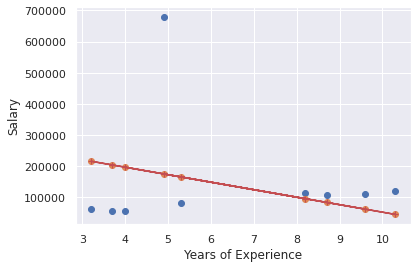

In [64]:
plt.scatter(X_test,y_test)#in blue
plt.scatter(X_test,y_pred)#in orange 
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.plot(X_test,y_pred,color = 'r',marker= '+',ls='-')#best fit line